In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from lmfit.models import GaussianModel

In [127]:
df = pd.read_csv("../data/mmpcurve.csv")

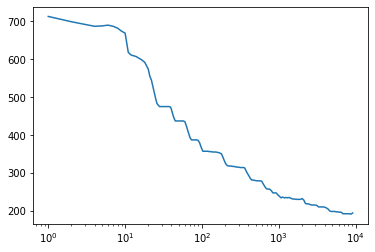

In [128]:
plt.plot(df['Secs'], df['Watts'])
plt.xscale('log')

In [130]:
model = GaussianModel()

In [131]:
params = model.guess(df['Watts'], x=df['Secs'])
result = model.fit(df['Watts'], x=df['Secs'])

In [ ]:
def gauss()

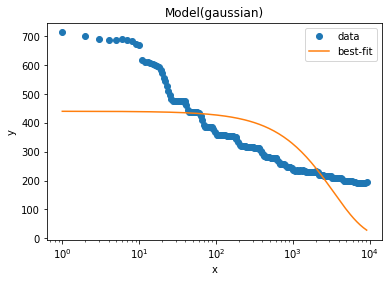

In [132]:
result.plot_fit()
plt.xscale('log')
plt.show()

In [133]:
# Assuming we know that the desired function is a polynomial of 4th degree, we
# allocate a vector of size 5 to hold the coefficients and initialize it with
# random noise.
w = torch.tensor(torch.randn([5, 1]), requires_grad=True)

# We use the Adam optimizer with learning rate set to 0.1 to minimize the loss.
opt = torch.optim.Adam([w], 0.1)

def model(x):
    # We define yhat to be our estimate of y.
    f = torch.stack([x*x*x*x, x*x*x, x*x, x, torch.ones_like(x)], 1)
    yhat = torch.squeeze(f @ w, 1)
    return yhat

def compute_loss(y, yhat):
    # The loss is defined to be the mean squared error distance between our
    # estimate of y and its true value. 
    loss = torch.nn.functional.mse_loss(yhat, y)
    return loss

def generate_data():
    # Generate some training data based on the true function
    x = torch.tensor(df['Secs'].values.astype(np.float32))
    y = torch.tensor(df['Watts'].values.astype(np.float32))
    return x, y

def train_step():
    x, y = generate_data()

    yhat = model(x)
    loss = compute_loss(y, yhat)

    opt.zero_grad()
    loss.backward()
    opt.step()

for _ in range(10000):
    train_step()

print(w.detach().numpy())

/Users/julienmika/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


[[-3.4782779e-01]
 [-3.2886934e-01]
 [-4.8869932e-01]
 [ 1.0025650e+03]
 [ 9.9991296e+02]]


In [134]:
x, y = generate_data()

In [188]:
def f(x):
    return 255+10000.0 / x * (1.0 - np.exp( -x / 20.0))

In [189]:
x = np.linspace(0, 10000, 10000)
y = f(x)

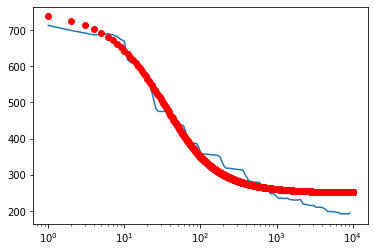

In [190]:
plt.xscale('log')
plt.plot(df['Secs'], df['Watts'], label='MMP')
plt.plot(x,y,'ro', label='fit')